In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [246]:
df = pd.read_csv('preprocessed/data1h.csv', index_col=0, parse_dates=True)
df

,MpKrakZloRog,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindSpeed,AirPressure,year,day_off,month_sin,month_cos,hour_sin,hour_cos,sin_WindDir,cos_WindDir
2016-01-01 01:00:00,342.9240,-9.153333,0.000000,0.00,1.1,71.593333,0.703333,1000.516667,2016,1,5.000000e-01,0.866025,0.258819,0.965926,-0.996195,-0.087156
2016-01-01 02:00:00,329.6600,-9.475000,0.000000,0.00,1.4,71.685000,0.698333,1000.363333,2016,1,5.000000e-01,0.866025,0.500000,0.866025,-0.999848,-0.017452
2016-01-01 03:00:00,322.5390,-9.851667,0.000000,0.00,1.6,71.863333,0.743333,1000.123333,2016,1,5.000000e-01,0.866025,0.707107,0.707107,-0.974370,0.224951
2016-01-01 04:00:00,294.5480,-10.175000,0.000000,0.00,1.4,71.668333,0.661667,1000.190000,2016,1,5.000000e-01,0.866025,0.866025,0.500000,-0.961262,0.275637
2016-01-01 05:00:00,285.5270,-10.160000,0.000000,0.00,1.5,71.786667,0.600000,999.881667,2016,1,5.000000e-01,0.866025,0.965926,0.258819,-0.939693,-0.342020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,29.7133,4.635000,0.000000,0.00,1.6,74.210000,0.866667,980.588333,2023,1,-2.449294e-16,1.000000,-0.965926,0.258819,0.974370,0.224951
2023-12-31 20:00:00,32.3285,4.368333,0.000000,0.00,1.4,74.971667,0.721667,980.480000,2023,1,-2.449294e-16,1.000000,-0.866025,0.500000,0.358368,0.933580
2023-12-31 21:00:00,38.2589,3.943333,0.000000,0.00,1.2,76.206667,0.546667,980.611667,2023,1,-2.449294e-16,1.000000,-0.707107,0.707107,-0.358368,0.933580
2023-12-31 22:00:00,41.0132,3.903333,0.000000,0.00,1.5,76.143333,0.585000,980.510000,2023,1,-2.449294e-16,1.000000,-0.500000,0.866025,-0.515038,0.857167


<Axes: >

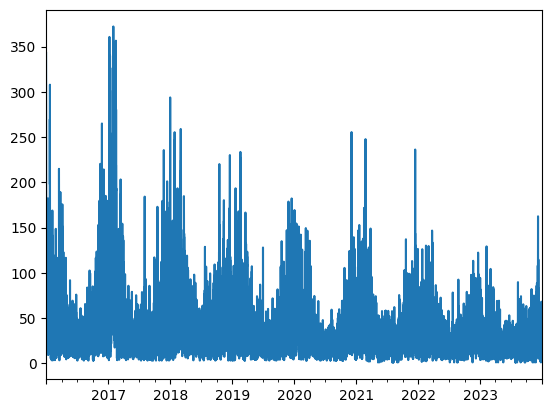

In [247]:
df.MpKrakZloRog.plot()
# outliers

In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Hourly forecast

## One feature 

In [199]:
# only for pollution
def df_to_X_y_single(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)       

In [200]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame({'Predictions': predictions, 'Actual Value': y})
    plt.plot(df['Actual Value'][start:end], label='Actual Value')
    plt.plot(df['Predictions'][start:end], label='Predictions')
    plt.legend()
    plt.show()
    return df, mean_squared_error(y, predictions), r2_score(y, predictions)

In [201]:
X, y = df_to_X_y_single(df.MpKrakZloRog, window_size=24)

In [202]:
train_size = 60000
val_size = 5000

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:val_size], y[train_size:val_size]
X_test, y_test = X[val_size:], y[val_size:]

In [203]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 23, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │        11,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,985 (46.82 KB)

 Trainable params: 11,985 (46.82 KB)

 Non-trainable params: 0 (0.00 B)

In [204]:
cp = ModelCheckpoint('models/1h/single.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [205]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 234.1302 - root_mean_squared_error: 14.9806
Epoch 2/15
  65/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 95.3148 - root_mean_squared_error: 9.7546  

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 96.2252 - root_mean_squared_error: 9.8084
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 90.1170 - root_mean_squared_error: 9.4911
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 90.8164 - root_mean_squared_error: 9.5253
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 92.7676 - root_mean_squared_error: 9.6265
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 92.6940 - root_mean_squared_error: 9.6215
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 88.6590 - root_mean_squared_error: 9.4126
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 89.9063 - root_mean_squared_error: 9.4796
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 88.0216 - root_mean_squared_error: 9.3774
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 89.9335 - root_mean_squared_error: 9.4803
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 89.9162 - r

2035/2035 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step


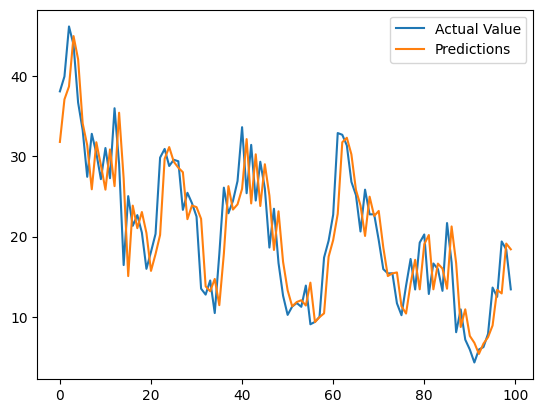

(       Predictions  Actual Value
 0        31.773359       38.0649
 1        37.067196       39.9117
 2        38.676723       46.1364
 3        44.938114       43.8556
 4        42.049618       36.6714
 ...            ...           ...
 65098    21.604689       29.7133
 65099    30.293520       32.3285
 65100    32.059315       38.2589
 65101    37.106590       41.0132
 65102    39.930981       47.8850
 
 [65103 rows x 2 columns],
 np.float64(80.94097004707682),
 0.9076402405858445)

In [206]:
plot_predictions(model, X_test, y_test)

## Date and weather features

In [249]:
def df_to_X_y_dw(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size, 1:]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)    

In [250]:
train_size = 60000
val_size = 5000

df_train = df.iloc[:train_size].copy()
df_val = df.iloc[train_size:train_size+val_size].copy()
df_test = df.iloc[train_size+val_size:].copy()

In [251]:
columns_to_scale = ['MpKrakZloRog', 'AirTemp', 'rainIntensity', 'rainAccumulation',
       'maxWindSpeed', 'RelativeHumidity', 'WindSpeed', 'AirPressure', 'year']

# scaler just for training data to prevent data leakage
scaler = StandardScaler()
scaler.fit(df_train[columns_to_scale])

df_train[columns_to_scale] = scaler.transform(df_train[columns_to_scale])
df_val[columns_to_scale] = scaler.transform(df_val[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

In [252]:
X_train, y_train = df_to_X_y_dw(df_train)
X_val, y_val = df_to_X_y_dw(df_val)
X_test, y_test = df_to_X_y_dw(df_test)

In [253]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2]))) # X_train.shape[1], X_train.shape[2]
model.add(LSTM(64))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 64)             │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,009 (82.07 KB)

 Trainable params: 21,009 (82.07 KB)

 Non-trainable params: 0 (0.00 B)

In [254]:
cp = ModelCheckpoint('models/1h/weather_date.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [255]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 0.5120 - root_mean_squared_error: 0.7112 - val_loss: 0.1686 - val_root_mean_squared_error: 0.4106
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - loss: 0.2891 - root_mean_squared_error: 0.5376 - val_loss: 0.1635 - val_root_mean_squared_error: 0.4043
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 0.2481 - root_mean_squared_error: 0.4980 - val_loss: 0.1730 - val_root_mean_squared_error: 0.4160
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 0.2321 - root_mean_squared_error: 0.4817 - val_loss: 0.1731 - val_root_mean_squared_error: 0.4160
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.2135 - root_mean_squared_error: 0.4620 - val_loss: 0.1778 - val_root_mean_squared_error: 0.4217
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 0.2054 - root_mean_squared_error: 0.4532 - val_loss: 0.1655 - val_root_mean_squared_error: 0.4069
Epoch 7/15
1875/1875 ━━━━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


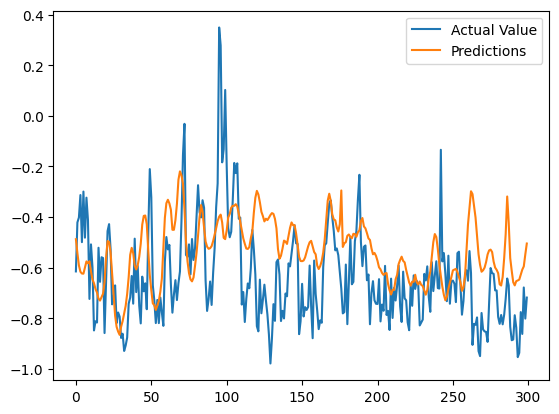

(      Predictions  Actual Value
 0       -0.487377     -0.614639
 1       -0.542242     -0.421130
 2       -0.590809     -0.401610
 3       -0.615952     -0.312898
 4       -0.623035     -0.498991
 ...           ...           ...
 5098    -0.009819     -0.199049
 5099     0.100054     -0.116019
 5100     0.217145      0.072264
 5101     0.310438      0.159711
 5102     0.353379      0.377883
 
 [5103 rows x 2 columns],
 np.float64(0.11674714237372058),
 0.5486182234329502)

In [256]:
plot_predictions(model, X_test, y_test, start=0, end=300)

## All features

In [223]:
# more features
def df_to_X_y(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)        

In [224]:
X_train, y_train = df_to_X_y(df_train)
X_val, y_val = df_to_X_y(df_val)
X_test, y_test = df_to_X_y(df_test)

In [225]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,265 (83.07 KB)

 Trainable params: 21,265 (83.07 KB)

 Non-trainable params: 0 (0.00 B)

In [230]:
cp = ModelCheckpoint('models/1h/all.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()]) 

In [231]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0771 - root_mean_squared_error: 0.2777 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1835
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0738 - root_mean_squared_error: 0.2717 - val_loss: 0.0333 - val_root_mean_squared_error: 0.1826
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0746 - root_mean_squared_error: 0.2729 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1960
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0700 - root_mean_squared_error: 0.2645 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1818
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0693 - root_mean_squared_error: 0.2632 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1806
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0675 - root_mean_squared_error: 0.2598 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1820
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


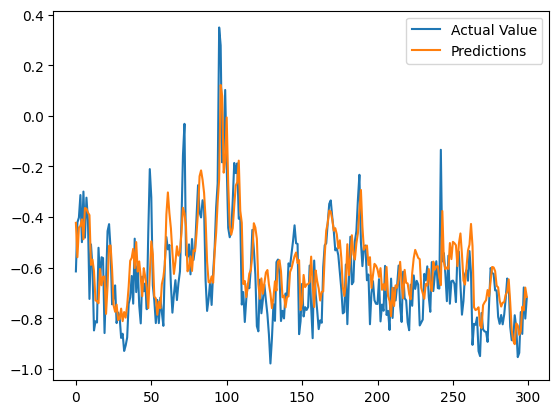

(      Predictions  Actual Value
 0       -0.422825     -0.614639
 1       -0.558459     -0.421130
 2       -0.441266     -0.401610
 3       -0.434552     -0.312898
 4       -0.408915     -0.498991
 ...           ...           ...
 5098    -0.363895     -0.199049
 5099    -0.093673     -0.116019
 5100     0.033414      0.072264
 5101     0.165452      0.159711
 5102     0.197580      0.377883
 
 [5103 rows x 2 columns],
 np.float64(0.030264054178608515),
 0.8829894911043517)

In [232]:
plot_predictions(model, X_test, y_test, start=0, end=300)
# all features won't be helpful if predictions is just for the next hour

# Direct Multi-Step Forecasting

In [236]:
def df_to_X_y_multi(df, window_size=24, forecast_horizon=12):
    df_as_np = df.to_numpy()
    X, y = [], []
    for i in range(len(df_as_np) - window_size - forecast_horizon):
        X.append(df_as_np[i:i+window_size])
        y.append(df_as_np[i+window_size:i+window_size+forecast_horizon, 0])
    return np.array(X), np.array(y)

In [237]:
forecast_horizon = 12 
X_train, y_train = df_to_X_y_multi(df_train, forecast_horizon=forecast_horizon)
X_val, y_val = df_to_X_y_multi(df_val, forecast_horizon=forecast_horizon)
X_test, y_test = df_to_X_y_multi(df_test, forecast_horizon=forecast_horizon)

In [238]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(8, activation='relu'))
model.add(Dense(forecast_horizon, activation='linear'))
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 12)             │           108 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,364 (83.45 KB)

 Trainable params: 21,364 (83.45 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
cp = ModelCheckpoint('models/multi/model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [240]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.6978 - root_mean_squared_error: 0.8336 - val_loss: 0.1815 - val_root_mean_squared_error: 0.4260
Epoch 2/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3597 - root_mean_squared_error: 0.5996 - val_loss: 0.1594 - val_root_mean_squared_error: 0.3993
Epoch 3/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3133 - root_mean_squared_error: 0.5597 - val_loss: 0.1508 - val_root_mean_squared_error: 0.3883
Epoch 4/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2973 - root_mean_squared_error: 0.5451 - val_loss: 0.1459 - val_root_mean_squared_error: 0.3820
Epoch 5/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2708 - root_mean_squared_error: 0.5204 - val_loss: 0.1401 - val_root_mean_squared_error: 0.3743
Epoch 6/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.2513 - root_mean_squared_error: 0.5013 - val_loss: 0.1404 - val_root_mean_squared_error: 0.3747
Epoch 7/15
1874/1874 ━━━━━━━━━━━━━

In [241]:
# for ech row next n hours
y_pred = model.predict(X_test)

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [242]:
mse = [mean_squared_error(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
r2 = [r2_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

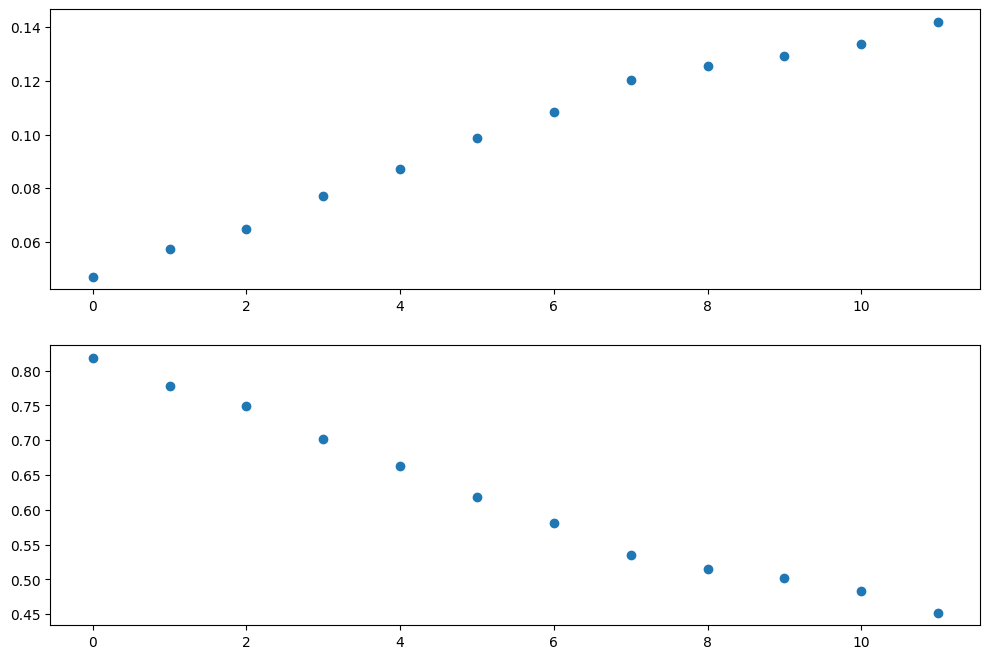

In [243]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].scatter(x = range(y_test.shape[1]), y = mse)
axs[1].scatter(x = range(y_test.shape[1]), y = r2)
plt.show()